# CSE474/574 - Programming Assignment 2

## Part 2 - Image Classification

Additional library requirement: `Pillow`. See [here](https://anaconda.org/anaconda/pillow) for installation instructions.

For this part, we will use `keras` with a `tensorflow` backend, instead of directly using `tensorflow`, as in Part 1. See [here](https://anaconda.org/conda-forge/keras) for installation instructions.

In [25]:
from __future__ import print_function
from keras.models import Sequential
from keras.layers import Dense, Activation

import numpy as np
import random as rd
import time
import pickle
import os
from PIL import Image
#os.environ["CUDA_VISIBLE_DEVICES"]="1"
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
def resize_images(data,size):
    '''
    Resize images in a given data matrix (1 per row) to the specified size in the tuple - size.
    '''
    resized_data = np.empty((data.shape[0],size[0]*size[1]))
    for i in range(data.shape[0]):
        d = (np.array(Image.fromarray(data[i,:].reshape((28,28))).resize(size))).flatten()
        resized_data[i,:] = d
    return resized_data    

In [27]:
classes = ['apple', 'airplane', 'basketball', 'axe', 'banana', 'horse', 'arm', 'alarm clock', 'ant', 'bed']

In [166]:
# Preparing the data set
with open('AI_quick_draw.pickle', 'rb') as open_ai_quick:
    data_train = pickle.load(open_ai_quick)
    label_train1 = pickle.load(open_ai_quick)
    data_test = pickle.load(open_ai_quick)
    label_test1 = pickle.load(open_ai_quick)
n_classes = len(np.unique(label_train1))
# convert labels to 0-1 hot encoding
label_train = np.zeros((label_train1.shape[0], n_classes))
a = np.arange(label_train1.shape[0], dtype=np.int64)
b = np.array(label_train1, dtype=np.int64).reshape((label_train1.shape[0],))
label_train[a, b] = 1

label_test = np.zeros((label_test1.shape[0], n_classes))
c = np.arange(label_test1.shape[0], dtype=np.int64)
d = np.array(label_test1, dtype=np.int64).reshape((label_test1.shape[0],))
label_test[c, d] = 1

In [167]:
#data_train = resize_images(data_train,(20,20))
#data_train = resize_images(data_train,(15,15))
#data_train = resize_images(data_train,(10,10))
data_train = resize_images(data_train,(5,5))

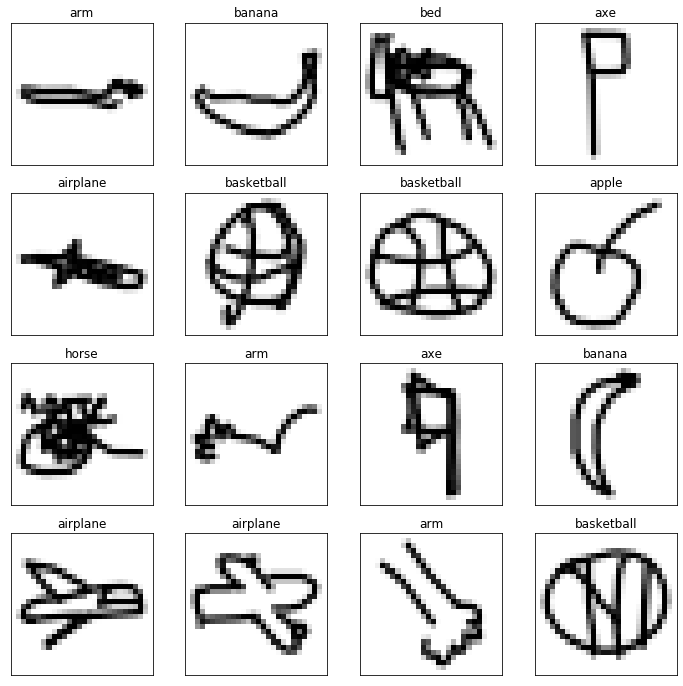

In [49]:
# visualize some images
fig = plt.figure(figsize=[12,12])
for i in range(16):
    ax = plt.subplot(4,4,i+1)    
    ind = np.random.randint(0,data_train.shape[0])
    plt.imshow(data_train[ind,:].reshape((28,28)),cmap='Greys')
    plt.xticks([])
    plt.yticks([])
    t = plt.title(classes[int(label_train1[ind])])

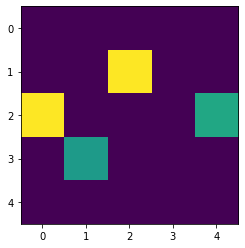

In [168]:
#check the resized training data
#plt.imshow(data_train[2].reshape(20,20))
#plt.imshow(data_train[2].reshape(15,15))
#plt.imshow(data_train[2].reshape(10,10))
plt.imshow(data_train[2].reshape(5,5))

In [7]:
# for some macosx installations, conflicting copies of mpilib causes trouble with tensorflow.
# use the following two lines to resolve that issue
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

**WARNING**: This cell will take a significantly long time to run

In [169]:
import time
start_time = time.time()
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=data_train.shape[1]))
# you can add more Dense layers here
model.add(Dense(256, activation='relu'))
#model.add(Dense(256, activation='relu'))
#model.add(Dense(256, activation='relu'))
#model.add(Dense(256, activation='relu'))

model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(data_train, label_train, epochs=500, batch_size=32)
time_taken = (time.time() - start_time)
print("--- %s seconds ---" % (time_taken))

Epoch 1/500
100000/100000 [==============================] - 9s 88us/step - loss: 1.9781 - accuracy: 0.4673
Epoch 2/500
100000/100000 [==============================] - 7s 73us/step - loss: 1.4181 - accuracy: 0.5262
Epoch 3/500
100000/100000 [==============================] - 7s 71us/step - loss: 1.3714 - accuracy: 0.5430
Epoch 4/500
100000/100000 [==============================] - 7s 71us/step - loss: 1.3524 - accuracy: 0.5518
Epoch 5/500
100000/100000 [==============================] - 7s 74us/step - loss: 1.3389 - accuracy: 0.5583
Epoch 6/500
100000/100000 [==============================] - 7s 72us/step - loss: 1.3287 - accuracy: 0.5645
Epoch 7/500
100000/100000 [==============================] - 7s 71us/step - loss: 1.3253 - accuracy: 0.5649
Epoch 8/500
100000/100000 [==============================] - 7s 73us/step - loss: 1.3268 - accuracy: 0.5664
Epoch 9/500
100000/100000 [==============================] - 7s 72us/step - loss: 1.3184 - accuracy: 0.5688
Epoch 10/500
100000/100000 [

100000/100000 [==============================] - 6s 65us/step - loss: 1.3767 - accuracy: 0.5679
Epoch 151/500
100000/100000 [==============================] - 7s 68us/step - loss: 1.3672 - accuracy: 0.5695
Epoch 152/500
100000/100000 [==============================] - 6s 64us/step - loss: 1.3673 - accuracy: 0.5687
Epoch 153/500
100000/100000 [==============================] - 6s 62us/step - loss: 1.3698 - accuracy: 0.5701
Epoch 154/500
100000/100000 [==============================] - 6s 62us/step - loss: 1.3815 - accuracy: 0.5694
Epoch 155/500
100000/100000 [==============================] - 6s 62us/step - loss: 1.3703 - accuracy: 0.5697
Epoch 156/500
100000/100000 [==============================] - 6s 63us/step - loss: 1.3755 - accuracy: 0.5706
Epoch 157/500
100000/100000 [==============================] - 6s 62us/step - loss: 1.3802 - accuracy: 0.5683
Epoch 158/500
100000/100000 [==============================] - 6s 62us/step - loss: 1.3886 - accuracy: 0.5706
Epoch 159/500
100000/100

100000/100000 [==============================] - 7s 72us/step - loss: 1.4396 - accuracy: 0.5580
Epoch 299/500
100000/100000 [==============================] - 7s 73us/step - loss: 1.4289 - accuracy: 0.5560
Epoch 300/500
100000/100000 [==============================] - 7s 73us/step - loss: 1.4558 - accuracy: 0.5582
Epoch 301/500
100000/100000 [==============================] - 7s 73us/step - loss: 1.4418 - accuracy: 0.5580
Epoch 302/500
100000/100000 [==============================] - 7s 73us/step - loss: 1.4252 - accuracy: 0.5580
Epoch 303/500
100000/100000 [==============================] - 7s 73us/step - loss: 1.4444 - accuracy: 0.5566
Epoch 304/500
100000/100000 [==============================] - 8s 77us/step - loss: 1.4398 - accuracy: 0.5562
Epoch 305/500
100000/100000 [==============================] - 7s 74us/step - loss: 1.4403 - accuracy: 0.5568
Epoch 306/500
100000/100000 [==============================] - 7s 73us/step - loss: 1.4312 - accuracy: 0.5554
Epoch 307/500
100000/100

100000/100000 [==============================] - 6s 64us/step - loss: 1.4937 - accuracy: 0.5354
Epoch 447/500
100000/100000 [==============================] - 7s 66us/step - loss: 1.4885 - accuracy: 0.5331
Epoch 448/500
100000/100000 [==============================] - 7s 66us/step - loss: 1.5157 - accuracy: 0.5342
Epoch 449/500
100000/100000 [==============================] - 7s 66us/step - loss: 1.5024 - accuracy: 0.5356
Epoch 450/500
100000/100000 [==============================] - 6s 63us/step - loss: 1.5071 - accuracy: 0.5326
Epoch 451/500
100000/100000 [==============================] - 6s 62us/step - loss: 1.4961 - accuracy: 0.5348
Epoch 452/500
100000/100000 [==============================] - 6s 64us/step - loss: 1.5290 - accuracy: 0.5348
Epoch 453/500
100000/100000 [==============================] - 6s 62us/step - loss: 1.4967 - accuracy: 0.5328
Epoch 454/500
100000/100000 [==============================] - ETA: 0s - loss: 1.4980 - accuracy: 0.53 - 6s 62us/step - loss: 1.4983 -

In [33]:
#default model (one layer) ( 28*28)
#time taken 5737.14062 seconds
predict_test = model.predict_classes(data_test)
acc_test = np.where(label_test1==predict_test)[0].shape[0]/data_test.shape[0]
print('Testing accuracy{}'.format(acc_test))

Testing accuracy0.66412


In [35]:
#with three layers(28*28)
#time taken 8926.286591 seconds
predict_test = model.predict_classes(data_test)
acc_test = np.where(label_test1==predict_test)[0].shape[0]/data_test.shape[0]
print('Testing accuracy{}'.format(acc_test))

Testing accuracy0.23084


In [40]:
#with five layers(28*28)
predict_test = model.predict_classes(data_test)
acc_test = np.where(label_test1==predict_test)[0].shape[0]/data_test.shape[0]
print('Testing accuracy{}'.format(acc_test))
print("time taken : "+ str(time_taken))

Testing accuracy0.1
time taken : 13418.315411806107


In [42]:
#with two layers(28*28)
predict_test = model.predict_classes(data_test)
acc_test = np.where(label_test1==predict_test)[0].shape[0]/data_test.shape[0]
print('Testing accuracy{}'.format(acc_test))
print("time taken : "+ str(time_taken))

Testing accuracy0.24928
time taken : 7160.738799571991


In [98]:
#20*20  image resize ( 1 layer)
data_test = resize_images(data_test,(20,20))
predict_test = model.predict_classes(data_test)
acc_test = np.where(label_test1==predict_test)[0].shape[0]/data_test.shape[0]
print('Testing accuracy{}'.format(acc_test))
print("time taken : "+ str(time_taken))

Testing accuracy0.68224
time taken : 4082.5093047618866


In [77]:
#15*15  image resize (1 layer)
data_test = resize_images(data_test,(15,15))
predict_test = model.predict_classes(data_test)
acc_test = np.where(label_test1==predict_test)[0].shape[0]/data_test.shape[0]
print('Testing accuracy{}'.format(acc_test))
print("time taken : "+ str(time_taken))

Testing accuracy0.6926
time taken : 2882.3592336177826


In [82]:
#10*10  image resize(1 layer)
data_test = resize_images(data_test,(10,10))
predict_test = model.predict_classes(data_test)
acc_test = np.where(label_test1==predict_test)[0].shape[0]/data_test.shape[0]
print('Testing accuracy{}'.format(acc_test))
print("time taken : "+ str(time_taken))

Testing accuracy0.63284
time taken : 2355.3286929130554


In [163]:
#5*5  image resize ( 1 layer)
data_test = resize_images(data_test,(5,5))
predict_test = model.predict_classes(data_test)
acc_test = np.where(label_test1==predict_test)[0].shape[0]/data_test.shape[0]
print('Testing accuracy{}'.format(acc_test))
print("time taken : "+ str(time_taken))

Testing accuracy0.46232
time taken : 2055.7911891937256


In [104]:
#20*20  image resize ( 2 layer)
data_test = resize_images(data_test,(20,20))
predict_test = model.predict_classes(data_test)
acc_test = np.where(label_test1==predict_test)[0].shape[0]/data_test.shape[0]
print('Testing accuracy{}'.format(acc_test))
print("time taken : "+ str(time_taken))

Testing accuracy0.25028
time taken : 5388.183333158493


In [109]:
#15*15  image resize (2 layer)
data_test = resize_images(data_test,(15,15))
predict_test = model.predict_classes(data_test)
acc_test = np.where(label_test1==predict_test)[0].shape[0]/data_test.shape[0]
print('Testing accuracy{}'.format(acc_test))
print("time taken : "+ str(time_taken))

Testing accuracy0.233
time taken : 4508.592120409012


In [114]:
#10*10  image resize(2 layer)
data_test = resize_images(data_test,(10,10))
predict_test = model.predict_classes(data_test)
acc_test = np.where(label_test1==predict_test)[0].shape[0]/data_test.shape[0]
print('Testing accuracy{}'.format(acc_test))
print("time taken : "+ str(time_taken))

Testing accuracy0.17048
time taken : 3595.2470846176147


In [170]:
#5*5  image resize ( 2 layer)
data_test = resize_images(data_test,(5,5))
predict_test = model.predict_classes(data_test)
acc_test = np.where(label_test1==predict_test)[0].shape[0]/data_test.shape[0]
print('Testing accuracy{}'.format(acc_test))
print("time taken : "+ str(time_taken))

Testing accuracy0.50996
time taken : 3682.2164652347565


In [89]:
# save the model to use with the drawing app (this will be released later)
model.save('pa2-part2-model.h5')

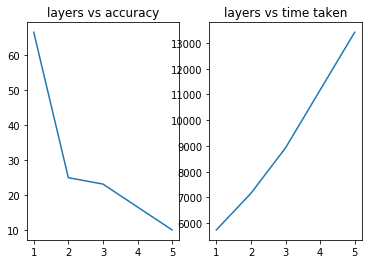

In [136]:
#one layer plot
x_layers = [1,2,3,5]
y_accuracy = [66.4,24.9,23.08,10]
z_time = [5737,7160,8926,13418]
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(x_layers,y_accuracy)
ax1.title.set_text("layers vs accuracy")
#plt.xlabels("hello")
# fig.xlabels("number of layers")
# fig.ylabels("accuracy %")

ax2.plot(x_layers,z_time)
ax2.title.set_text("layers vs time taken")

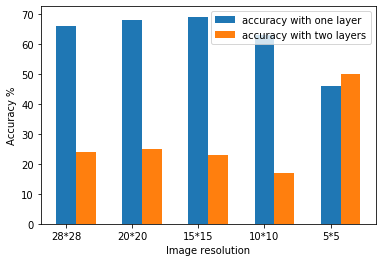

In [172]:
#accuracies are rounded off(accurate accuracies are above)
accuracy1 = [66,68,69,63,46]
accuracy2 = [24,25,23,17,50]
resized_images = ['28*28', '20*20', '15*15', '10*10', '5*5']
width =0.3
plt.bar(resized_images, accuracy1, width=width)
plt.bar(np.arange(len(accuracy2))+ width, accuracy2, width=width)
plt.xlabel("Image resolution")
plt.ylabel("Accuracy %")
plt.legend({'accuracy with one layer':'blue', 'accuracy with two layers':'orange'} )
plt.show()

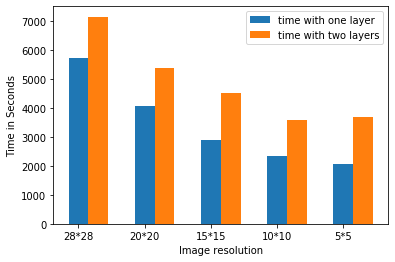

In [171]:
time_taken1 = [5737,4082,2882,2355,2055]
time_taken2 = [7160,5388,4508,3595,3682]
resized_images = ['28*28', '20*20', '15*15', '10*10', '5*5']
width =0.3
plt.xlabel("Image resolution")
plt.ylabel("Time in Seconds")
plt.bar(resized_images, time_taken1, width=width)
plt.bar(np.arange(len(time_taken2))+ width, time_taken2, width=width)
plt.legend({'time with one layer':'blue', 'time with two layers':'orange'} )
plt.show()